In [1]:
using Revise
using RCall

In [44]:
R"""
library(tidyverse)
library(viridis)
"""

RObject{StrSxp}
 [1] "viridis"     "viridisLite" "forcats"     "stringr"     "dplyr"      
 [6] "purrr"       "readr"       "tidyr"       "tibble"      "ggplot2"    
[11] "tidyverse"   "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       


In [132]:
R"""
df <- read_csv("throughput/data-throughput/contact-high-school-classes.csv")

df %>% 
    mutate(obj = cost_SS / tot_SS) %>% 
    filter(obj > 0) %>% 
    filter(round > 3) %>% 
    group_by(ngroups, nev) %>% 
    filter(obj == min(obj)) %>% 
    filter(row_number() == 1)
"""

┌ Warning: RCall.jl: Parsed with column specification:
│ cols(
│   ngroups = col_double(),
│   nev = col_double(),
│   tot_SS = col_double(),
│   cost_SS = col_double(),
│   ari = col_double(),
│   round = col_double(),
│   data = col_character()
│ )
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{VecSxp}
# A tibble: 42 x 8
# Groups:   ngroups, nev [42]
   ngroups   nev tot_SS  cost_SS   ari round data                            obj
     <dbl> <dbl>  <dbl>    <dbl> <dbl> <dbl> <chr>                         <dbl>
 1       3     2   471.    0.995 0.170     5 contact-high-school-classes 2.11e-3
 2      15     5  5701.  150.    0.401     4 contact-high-school-classes 2.62e-2
 3       5    10  3988.  463.    0.543    10 contact-high-school-classes 1.16e-1
 4      12    10  9747.  900.    0.589     4 contact-high-school-classes 9.23e-2
 5       3    30  7339. 5242.    0.280     4 contact-high-school-classes 7.14e-1
 6      15    30 36728. 7715.    0.710     6 contact-high-school-classes 2.10e-1
 7       5    40 16321. 8555.    0.572    10 contact-high-school-classes 5.24e-1
 8      10    40 32644. 8628.    0.863     9 contact-high-school-classes 2.64e-1
 9      15     2  2249.    0.5   0.182     7 contact-high-school-classes 2.22e-4
10      15    10 12185.  971.    0.645     8

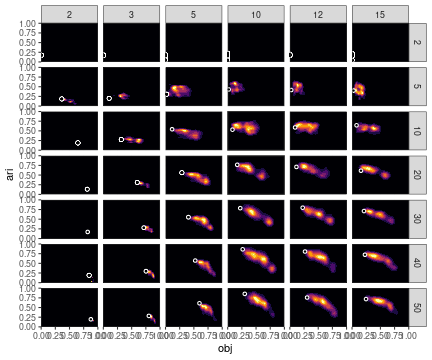

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 2 rows containing non-finite values (stat_density2d_filled).
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


In [128]:
R"""

df <- df %>% 
    filter(round >= 3) %>%
    mutate(obj = cost_SS / tot_SS)

best_objs <- df %>% 
    group_by(nev, ngroups) %>% 
    filter(obj == min(obj))

df %>% 
    ggplot() + 
    aes(x = obj, y = ari) + 
#    geom_point() + 
    geom_density_2d_filled(contour_var = "ndensity") + 
    geom_point(data = best_objs, color = "white") +
    geom_point(data = best_objs, color = "black", size = 0.5) +
    facet_grid(nev~ngroups) +
    theme_bw() +
    scale_fill_viridis_d(option = "inferno") + 
    guides(fill = FALSE) + 
    scale_x_continuous(limits = c(0, 1), expand = c(0,0)) +
    scale_y_continuous(limits = c(0, 1), expand = c(0,0))
"""

In [39]:
R"""
df %>% 
    group_by(ngroups, nev) %>% 
    summarise(mean_obj = mean(obj),
              mean_ari = mean(ari))
"""

┌ Warning: RCall.jl: `summarise()` regrouping output by 'ngroups' (override with `.groups` argument)
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{VecSxp}
# A tibble: 12 x 4
# Groups:   ngroups [4]
   ngroups   nev mean_obj mean_ari
     <dbl> <dbl>    <dbl>    <dbl>
 1       2    10    0.684    0.169
 2       2    20    0.825    0.154
 3       2    30    0.877    0.155
 4       3    10    0.545    0.263
 5       3    20    0.692    0.266
 6       3    30    0.782    0.258
 7       5    10    0.440    0.432
 8       5    20    0.562    0.443
 9       5    30    0.648    0.445
10      10    10    0.302    0.592
11      10    20    0.409    0.644
12      10    30    0.480    0.636


# Visualization of the eigenspace

In [54]:
using HypergraphNB
using Arpack
using MultivariateStats

data_name = "contact-high-school-classes"
H, z = HypergraphNB.read_hypergraph_data(data_name);

In [50]:
ẑ = z;
B = reducedBPJacobian(H, ẑ);

23544×23544 SparseArrays.SparseMatrixCSC{Float64,Int64} with 6388713 stored entries:
  [11773,     1]  =  -0.62525
  [13081,     1]  =  0.0241216
  [14389,     1]  =  0.0169263
  [15697,     1]  =  0.104193
  [17005,     1]  =  0.0848594
  [18313,     1]  =  0.0966677
  [19621,     1]  =  0.0948251
  [20929,     1]  =  0.0919626
  [22237,     1]  =  0.102408
  [11774,     2]  =  -0.62525
  [13082,     2]  =  0.0241216
  [14390,     2]  =  0.0169263
  ⋮
  [22236, 23544]  =  0.302752
  [22260, 23544]  =  -0.100917
  [22287, 23544]  =  -0.100917
  [22331, 23544]  =  -0.100917
  [22332, 23544]  =  -0.100917
  [22393, 23544]  =  -0.100917
  [22394, 23544]  =  -0.100917
  [22400, 23544]  =  -0.100917
  [22401, 23544]  =  -0.100917
  [22405, 23544]  =  -0.100917
  [22614, 23544]  =  -0.100917
  [22654, 23544]  =  -0.100917
  [23544, 23544]  =  0.302752

In [53]:
n_ev = 30
E = Arpack.eigs(B; nev = n_ev, ritzvec = true)            
V = hcat([HypergraphNB.transform_eigenvector(real.(E[2][:,i]), H) for i ∈ 1:n_ev]...)

327×270 Array{Float64,2}:
 -0.00015937   -0.0001314    -0.000243565  …  -0.000548526  -0.000340221
 -0.000212333  -0.000178315  -0.000332495     -0.000767539  -0.000490178
 -0.00132197   -0.00113345   -0.00217519       2.05898e-5   -0.00167612
 -0.00781362   -0.00659001   -0.013305        -0.000245346  -0.008837
 -0.00106117   -0.0008957    -0.00171504       0.00306627    0.00111158
 -0.00109275   -0.000911322  -0.00182167   …   0.00333548    0.00135878
 -0.00438906   -0.00377839   -0.00750624       0.000446892  -0.00458805
 -0.0054794    -0.00466971   -0.0092489        0.000500024  -0.00561835
 -0.00893819   -0.00757541   -0.0148229        0.000398475   0.00268646
 -0.000756334  -0.000652425  -0.0012037       -5.20543e-7    0.000122882
 -0.00624991   -0.00523975   -0.0101153    …   5.89806e-5    0.00137945
 -0.000653472  -0.000550013  -0.00103611       0.0018021     0.000582806
 -0.00231357   -0.00194663   -0.00381735       0.00291226    7.36369e-5
  ⋮                                 

In [98]:
V_ = 1.0*(V .> 0)
M = fit(PCA, V_; maxoutdim=10)

PCA(indim = 327, outdim = 10, principalratio = 0.8592750722446776)

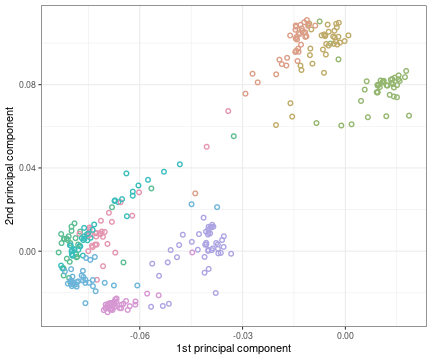

RObject{VecSxp}


In [106]:
R"""

library(colorspace)

df <- tibble(z = $z, m1 = $(M.proj[:,1]), m2 = $(M.proj[:,2]))

p <- df %>% 
    ggplot() + 
    aes(x = m1, y = m2, color = factor(z)) + 
    geom_point(pch = 21, stroke = 1) + 
    theme_bw() +
    xlab("1st principal component") + 
    ylab("2nd principal component") + 
    guides(color = F) + 
    scale_color_discrete_qualitative(palette = "dynamic")

"""

Groups 1, 2, and 3 are the classes 2BIO1, 2BIO2, 2BIO3, which might be imagined to be similar. 

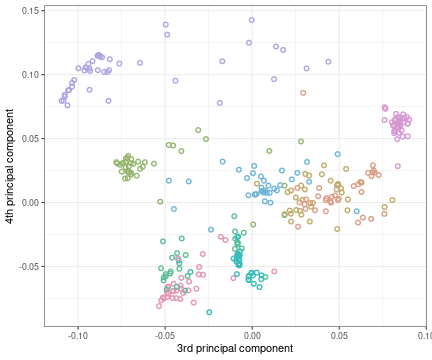

RObject{VecSxp}


In [107]:
R"""

df <- tibble(z = $z, m1 = $(M.proj[:,3]), m2 = $(M.proj[:,4]))

q <- df %>% 
    ggplot() + 
    aes(x = m1, y = m2, color = factor(z)) + 
    geom_point(pch = 21, stroke = 1) + 
    theme_bw() +
    xlab("3rd principal component") + 
    ylab("4th principal component") + 
    guides(color = F) + 
    scale_color_discrete_qualitative(palette = "dynamic")

"""

In [117]:
R"""
library(patchwork)

p / q

ggsave("fig/PCA.png", width = 4, height = 6, dpi = 300)
"""


RObject{NilSxp}
NULL


# Comparison against projections

┌ Warning: RCall.jl: Parsed with column specification:
│ cols(
│   ngroups = col_double(),
│   nev = col_double(),
│   tot_SS = col_double(),
│   cost_SS = col_double(),
│   ari = col_double(),
│   round = col_double(),
│   data = col_character()
│ )
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160
┌ Warning: RCall.jl: Parsed with column specification:
│ cols(
│   ngroups = col_double(),
│   nev = col_double(),
│   tot_SS = col_double(),
│   cost_SS = col_double(),
│   ari = col_double(),
│   round = col_double(),
│   data = col_character()
│ )
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


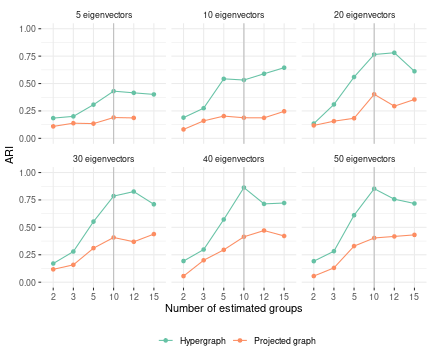

RObject{VecSxp}


In [257]:
R"""
df <- read_csv("throughput/data-throughput/contact-high-school-classes.csv") %>% 
    mutate(projected = "Hypergraph")
df_proj <- read_csv("throughput/data-throughput/contact-high-school-classes-projected.csv") %>% 
    mutate(projected = "Projected graph")

df <- df %>% 
    rbind(df_proj)



df %>% 
    mutate(obj = cost_SS / tot_SS) %>% 
    filter(obj > 0) %>% 
    filter(nev > 2) %>% 
    filter(round > 3) %>% 
    group_by(ngroups, nev, projected) %>% 
    filter(obj == min(obj)) %>% 
    filter(row_number() == 1) %>% 
    ggplot() + 
    aes(x = factor(ngroups), y = ari, color = projected, group = projected) +
    geom_line() +     
    geom_point() + 
    geom_vline(aes(xintercept = "10"), color = "grey") + 
    facet_wrap(~nev, labeller = labeller(nev = function(x) {paste(x, "eigenvectors")})) + 
    theme_bw() + 
    theme(strip.background = element_blank(),
          legend.position = "bottom",
          panel.border = element_rect(color = NA)) + 
    scale_color_brewer(palette = "Set2") +
    guides(color = guide_legend(title = element_blank())) + 
    xlab("Number of estimated groups") + 
    ylab("ARI") +
    scale_y_continuous(limits = c(0, 1))
    
"""

In [216]:
using StatsBase
using HypergraphNB
using Arpack
using MultivariateStats
using DataFrames

data_name = "contact-primary-school-classes"
H, z = HypergraphNB.read_hypergraph_data(data_name);
K_ = sort(collect(keys(H.E)))

ẑ = z

n = length(H.N)

c, G = degreeTensor(H, ẑ);
q = 1/n * StatsBase.counts(ẑ)
G_ = zero(G)
for i ∈ 1:length(K_)
    G_[i,:,:] = (G[i,:,:] / ((K_[i] - 1) * c[i]) .- 1) .* q
end

In [217]:
length(unique(z))

11

In [218]:
DF = DataFrame()

for i ∈ 1:length(unique(z))
    name = zeros(0)
    K = zeros(0)
    value = zeros(0)
    for k ∈ 1:size(G_, 1)
        push!(name, i)
        push!(value, G_[k,i,i])
        push!(K, K_[k])
    end
    df = DataFrame(name = name, value = value, K = K)
    DF = vcat(DF, df)
end

In [221]:
DF;

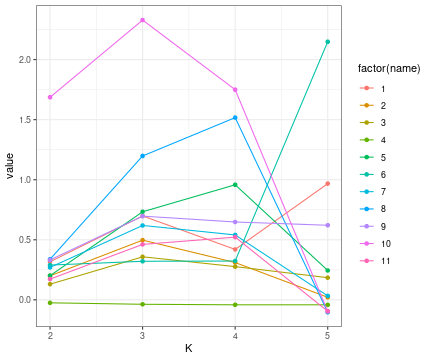

RObject{VecSxp}


In [220]:
R"""


df <- $DF

df %>% 
    ggplot() + 
    aes(x = K, y = value, color = factor(name), group = factor(name)) + 
    geom_line() + 
    geom_point() + 
    theme_bw()

"""